## UCI INCOME DATA CLASSIFICATION PROBLEM: 

Model Comparisons using Logistic Regression and Random Forest Classifier.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [187]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
import warnings
warnings.filterwarnings('ignore')

## load data

In [21]:
data = pd.read_csv('adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [23]:
data.isnull().sum() # check null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [26]:
data.shape # dimesions of the data

(48842, 15)

In [30]:
data.dtypes # types of the data

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [36]:
data.nunique() # unique values in the columns

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

## Decscibe the numerical data

In [252]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


## value count function

In [44]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [40]:
data['workclass'].value_counts() # gives the values count of the specific attribute in the columns

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [45]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [91]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [93]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [68]:
data.isin(['?']).any() # check columns with '?' 

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [105]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [107]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

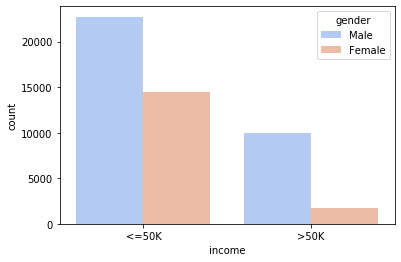

In [89]:
sns.countplot(data['income'], palette='coolwarm', hue= 'gender',data=data)

## Replace '?' with Mode (max occuered values)

In [153]:
data['workclass']=data['workclass'].replace('?','Private')

In [154]:
data['occupation']=data['occupation'].replace('?','Prof-specialty')

In [155]:
data['native-country']=data['native-country'].replace('?','United-States')

In [156]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Not-Married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,High School,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Higher,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Higher,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Higher,10,Not-Married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,School,6,Not-Married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,227026,High School,9,Not-Married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Higher,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Higher,10,Not-Married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,School,4,Married,Craft-repair,Husband,White,Male,0,0,10,United-States,0


## feature engineering

Manipulating data

In [157]:
# education feature engg
data['education']=data['education'].replace(['Preschool','5th-6th','1st-4th','7th-8th','9th','10th','11th','12th'],'School')
data['education']=data['education'].replace('HS-grad','High School')
data['education']=data['education'].replace(['Some-college','Assoc-voc','Assoc-acdm','Prof-school'],'Higher')
data['education']=data['education'].replace('Bachelors','Undergrad')
data['education']=data['education'].replace('Masters','Grad')
data['education']=data['education'].replace('Doctorate','Doc')

In [158]:
data.education.value_counts()

High School    15784
Higher         15374
Undergrad       8025
School          6408
Grad            2657
Doc              594
Name: education, dtype: int64

In [159]:
#marital-status engg
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
data['marital-status']=data['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Other')
data['marital-status']=data['marital-status'].replace('Never-married','Not-Married')

In [160]:
data['marital-status'].value_counts()

Married        23044
Not-Married    16117
Other           9681
Name: marital-status, dtype: int64

In [161]:
#income engg
data['income']=data['income'].replace('<=50K','0')
data['income']=data['income'].replace('>50K','1')

In [163]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

## Data Visualization and modelling

In [165]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


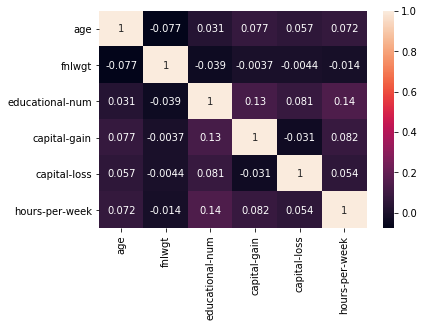

In [174]:
sns.heatmap(data.corr(),annot=True)


## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD147E6400>,
      dtype=object)

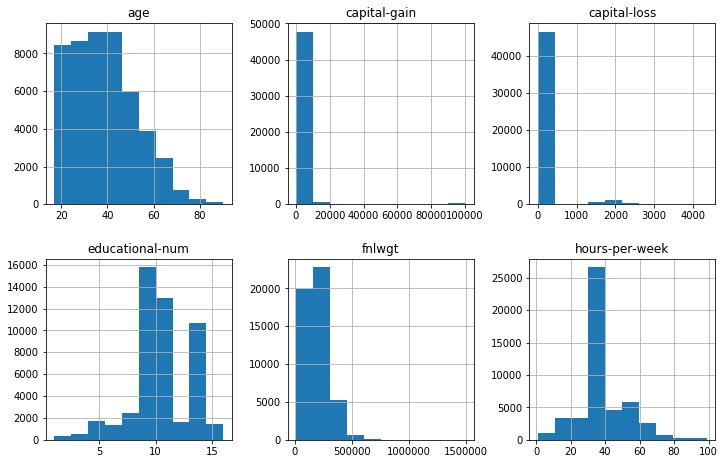

In [180]:
data.hist(figsize=(12,12), layout=(3,3), sharex=False)

## Boxplot

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

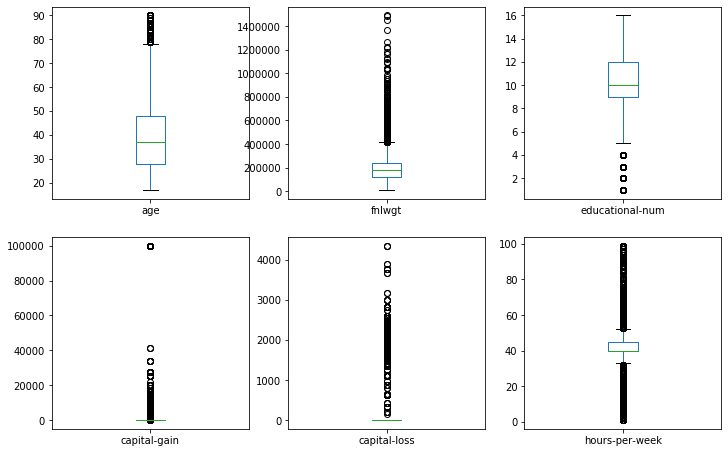

In [183]:
data.plot(kind='box', figsize=(12,12), layout=(3,3),sharex=False, subplots=True)

## plotly

In [194]:
px.pie(data, values='educational-num',names='education',title='Percentage of Education',
            color_discrete_sequence=px.colors.qualitative.T10)

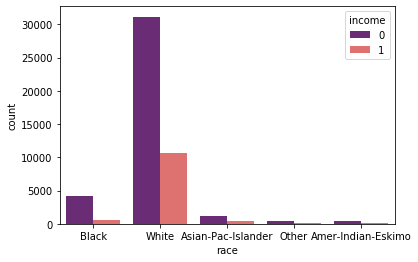

In [196]:
sns.countplot(data['race'], hue='income',data=data, palette='magma');

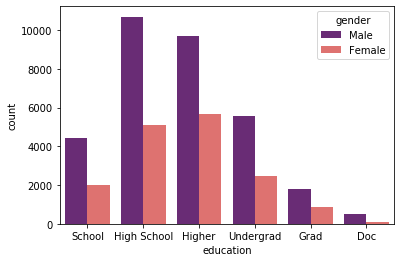

In [201]:
sns.countplot(data['education'], hue='gender',data=data, palette='magma');

## Model Building

In [204]:
X= data.drop(['income'], axis=1)
Y = data['income']

## Feature Scaling

To check the all the values has same weightage. so data values are scaled to get all values on same scale using StandardScaler

In [207]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 

In [209]:
data1=data.copy()

In [212]:
data1=data.apply(LabelEncoder().fit_transform)  # LabelEncoder converts categorical variabls into numeric and machine readbale format
data1.head()    # see education,occupation etc are converted into num category value

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,4,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,3,11,0,10,0,4,1,0,0,39,38,1
3,27,3,11201,3,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,3,9,1,9,3,4,0,0,0,29,38,0


In [222]:
ss = StandardScaler().fit(data1.drop('income', axis=1)) #created object ss and then fit it data1 without income

In [223]:
X= ss.transform(data1.drop('income', axis=1)) # transform on ss and X 
Y= data1['income'] # data without income (pred variable) in Y

## Training data, Test data

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [253]:
lr = LogisticRegression() # lr is object with LogisticRegression model

In [233]:
model = lr.fit(X_train, Y_train)

In [235]:
prediction = lr.predict(X_test)

In [239]:
print("Acc on training data: {:,.3f}".format(lr.score(X_train, Y_train))) # to print accuracy of LR on train
print("Acc on test data: {:,.3f}".format(lr.score(X_test,Y_test))) #to print accuracy of LR on test

Acc on training data: 0.837
Acc on test data: 0.838


## Random Forest Classifier

In [240]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, Y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, Y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, Y_test)))

Acc on training data: 1.000
Acc on test data: 0.858


In [241]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [243]:
print(confusion_matrix(Y_test, prediction1))

[[10345   793]
 [ 1289  2226]]


In [244]:
print(classification_report(Y_test, prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11138
           1       0.74      0.63      0.68      3515

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653



## for class : 0 (<=50K)

In [246]:
#Precision: tp/tp+fp
print('Precision =' , 10345/(10345+1289))

Precision = 0.8892040570740932


In [247]:
# recall= tp/tp+fn

print('Recall =', 10345/(10345+793))

Recall = 0.9288022984377806


## for other class : 1 (>50K)


In [250]:
print('Precision = ', 2226/(2226+793))

Precision =  0.7373302418019212


In [251]:
print('Recall= ', 2229/(2229+1289))

Recall=  0.6335986355884025


## Conclusion_: 
The Random Forest classifier gives the best result in terms of accuracy. 
The Random forest classifier classifies the income test data at the 85% accuracy. This can be further improved by other techniques.